In [43]:
!pip install imblearn

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from imblearn.over_sampling import SMOTE

In [72]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [77]:
bank_data = pd.read_csv('C:\\Users\\HP PC\\Documents\\EXCELR\\bank-full.csv')
bank_data = bank_data.dropna()
print(bank_data.shape)
print(list(bank_data.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [78]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [79]:
print(bank_data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [80]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [81]:
bank_data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [82]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [83]:
# Removing NA values in data set
bank_data = bank_data.dropna()
bank_data.shape

(45211, 17)

In [84]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [85]:
bank_data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


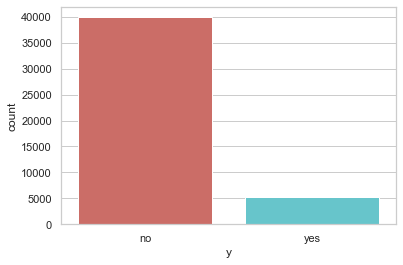

<Figure size 432x288 with 0 Axes>

In [86]:
sns.countplot(x = 'y', data=bank_data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [87]:
count_no_sub = len(bank_data[bank_data['y']=='no'])
count_sub = len(bank_data[bank_data['y']=='yes'])
print("No Subscription Count", count_no_sub)
print("Subscription Count",count_sub)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

No Subscription Count 39922
Subscription Count 5289
percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


In [88]:
bank_data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [89]:
# Dividing our data into input and output variables 
X = bank_data.iloc[:,1:]
Y = bank_data.iloc[:,0]

In [91]:
X

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [92]:
Y

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [93]:
import pandas as pd

In [94]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [95]:
bank_data_ = pd.DataFrame(bank_data)

In [96]:
bank_data_

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [97]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

Data Preprocessing

Create dummy variables, that is variables with only two values, zero and one.

In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

In [99]:
bank_data_ = pd.get_dummies(bank_data, columns =['job', 'marital', 'education','contact','default','housing', 'loan', 'poutcome','month','y'])

In [100]:
# Drop the unknown columns

bank_data_.drop(bank_data_.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
bank_data_.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_student',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'education_primary', 'education_secondary', 'education_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'y_no', 'y_yes'],
      dtype='object')

In [101]:
#Split the data into training and test sets

In [102]:
# Dividing our data into input and output variables 
X = bank_data_.iloc[:,1:]
Y = bank_data_.iloc[:,0]

Logistic Regression Model

Fit logistic regression to the training set

In [103]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X,Y)

LogisticRegression(random_state=0)

In [106]:
classifier.intercept_

array([-3.67703508e-05, -3.20591424e-05, -3.13898132e-05, -2.91949539e-05,
       -2.70220047e-05, -2.52954652e-05, -1.57920503e-05, -6.20785208e-06,
        2.98943914e-06,  1.16621204e-05,  2.30141960e-05,  3.67127788e-05,
        9.84864070e-05,  1.25955254e-04,  1.30049168e-04,  1.17027717e-04,
        1.16774922e-04,  1.11865685e-04,  1.02074217e-04,  8.81250462e-05,
        6.13900027e-05,  6.18462041e-05,  4.96321752e-05,  4.51503697e-05,
        4.86687872e-05,  3.76174066e-05,  3.53063491e-05,  4.34165698e-05,
        4.27470044e-05,  3.54602290e-05,  2.36947271e-05,  2.67054193e-05,
        1.99514320e-05,  1.98400773e-05,  2.35131999e-05,  1.11209435e-05,
        8.50658425e-06,  9.06234594e-06,  1.15225967e-05,  5.96717850e-06,
       -3.51662825e-06, -7.39666306e-06, -1.21989024e-05, -3.98612768e-05,
       -3.75462063e-05, -4.15608995e-05, -4.11402003e-05, -4.07804672e-05,
       -3.87062633e-05, -4.04225620e-05, -4.24566613e-05, -4.06249835e-05,
       -4.43570113e-05, -

In [107]:
classifier.coef_

array([[-1.46040819e-03, -6.06454448e-04, -6.75611288e-03, ...,
         1.12147963e-07, -3.60068501e-05, -7.63497759e-07],
       [-7.59027550e-04, -5.42992831e-04, -6.02142145e-03, ...,
         5.12314077e-07, -3.20590292e-05, -1.10502700e-10],
       [-2.00237465e-04, -5.02934217e-04, -5.38286619e-03, ...,
         6.77747183e-07, -3.20416264e-05,  6.51815745e-07],
       ...,
       [-1.53651710e-03, -6.30991479e-04, -7.00770959e-03, ...,
        -3.01009115e-07, -3.70519230e-05, -1.78897676e-06],
       [-1.55166910e-03, -6.33509874e-04, -7.21002296e-03, ...,
        -2.99752357e-07, -3.67090672e-05, -2.19479406e-06],
       [-1.52925507e-03, -6.28844252e-04, -7.16046264e-03, ...,
        -3.00504660e-07, -3.66733807e-05, -1.98975334e-06]])

In [108]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [109]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_values': classifier.predict(X)})

In [110]:
y_pred_df

,actual,predicted_values
0,58,32
1,44,32
2,33,32
3,47,32
4,33,32
...,...,...
45206,51,32
45207,71,32
45208,72,32
45209,57,32


Confusion Matrix

In [112]:
# Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [113]:
ac(Y,y_pred)

0.04675853221561124

In [114]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00        35
          20       0.00      0.00      0.00        50
          21       0.00      0.00      0.00        79
          22       0.00      0.00      0.00       129
          23       0.00      0.00      0.00       202
          24       0.00      0.00      0.00       302
          25       0.00      0.00      0.00       527
          26       0.00      0.00      0.00       805
          27       0.00      0.00      0.00       909
          28       0.00      0.00      0.00      1038
          29       0.00      0.00      0.00      1185
          30       0.00      0.00      0.00      1757
          31       0.06      0.04      0.04      1996
          32       0.05      0.83      0.09      2085
          33       0.05      0.15      0.08      1972
          34       0.00      0.00      0.00      1930
          35       0.05    